# House Regression

In [1]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read in Data

In [3]:
# Read CSV, set index, and sort index
df = (pd.read_csv(r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 10\3\02-Stu_House_Regression\Resources\CA_Housing.csv')).set_index("total_sq_ft").sort_index()

df.head(2)

,household_income,house_age,num_bedrooms,num_bathrooms,num_floors,sale_price
total_sq_ft,,,,,,
505,181976,25,5,2,2,122644
506,286106,11,4,2,1,163981


### Plot the Data

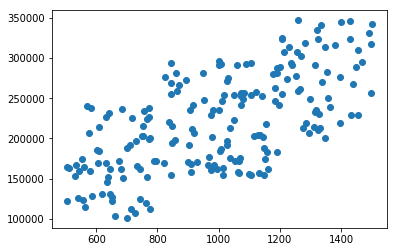

In [4]:
# Create a scatter plot of the data
plt.scatter(df.index, df.sale_price)

## Create a SciKitLearn Linear Regression Model

In [7]:
# Create a Linear Regression Model using sklearn
from sklearn.linear_model import LinearRegression

model = LinearRegression()

## Fit the Model to the Data

In [42]:
# Separate the data into the X and y components
# In this case, y will be the `Price` and X will be the remaining columns

X = df.drop("sale_price", axis=1)
X = X.index.values.reshape(-1,1)

y = df.sale_price

In [43]:
# Fit the model to the data
model.fit(X, y)

LinearRegression()

In [44]:
print(model.coef_)

[143.32180426]


In [45]:
print(model.intercept_)

77414.33742542914


## Make Predictions

In [46]:
# Make predictions using the X data
predicted_y_values = model.predict(X)
predicted_y_values

array([149791.84857632, 149935.17038058, 150651.77940187, 153374.8936828 ,
       153948.18089983, 155094.75533391, 155238.07713817, 156527.9733765 ,
       157101.26059354, 157674.54781057, 157961.19141909, 159251.08765742,
       159824.37487446, 160684.30570001, 161114.27111279, 161544.23652557,
       163550.7417852 , 164124.02900224, 164553.99441501, 164553.99441501,
       166130.53426186, 167850.39591297, 167850.39591297, 168423.68313001,
       168853.64854279, 169426.93575982, 169713.57936834, 169856.9011726 ,
       170860.15380242, 171003.47560668, 172293.37184501, 174013.23349612,
       174873.16432167, 175446.45153871, 176019.73875575, 177596.2786026 ,
       177882.92221112, 179029.49664519, 179746.10566649, 180032.749275  ,
       181465.9673176 , 182039.25453463, 182612.54175167, 183902.43799   ,
       183902.43799   , 184619.0470113 , 185335.65603259, 185478.97783685,
       185765.62144537, 186768.87407519, 187055.5176837 , 187055.5176837 ,
       187915.44850926, 1

In [47]:
compare_pred_vs_acutal = pd.DataFrame({'Actual': y, 
                                       'Predicted': predicted_y_values})
compare_pred_vs_acutal.head()

,Actual,Predicted
total_sq_ft,,
505,122644,149791.848576
506,163981,149935.170381
511,162949,150651.779402
530,153244,153374.893683
534,167132,153948.180900


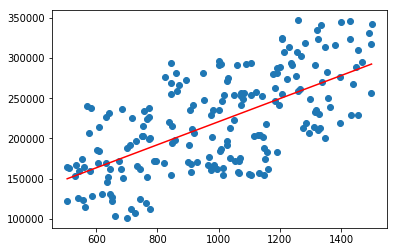

In [50]:
# Plot X and y as a scatter plot
# Plot X and the predictions as a red line plot
plt.scatter(df.index, df.sale_price)
plt.plot(df.index, predicted_y_values, color='red')

### Extract the coef, intercept, and calculate the score of the model

In [51]:
# Display the coefficient
print(model.coef_)

[143.32180426]


In [52]:
# Display the intercept
print(model.intercept_)

77414.33742542914


In [54]:
# R2 value
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

r2 = r2_score(y, predicted_y_values)

print(f"R2 is {r2}.")

R2 is 0.42007443076822404.
